# 导入相关库

In [43]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 导入数据

In [44]:
df = pd.read_csv(r'../input/income-classification/income_evaluation.csv')

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
df.shape

(32561, 15)

In [47]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [48]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


变量： 'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'                                      
这些数据是1994年人口普查局数据库中提取的。通过使用这个数据集，我尝试预测这个人的收入是超过5万还是低于5万，我用python实现了随机森林分类。另外，我还使用了集成学习来提高模型的精度。

# 数据预处理

### 纠正的列名称

In [49]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

### 检查缺失值

In [50]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

没有缺失值

#### 检查变量的数据类型

In [51]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### 分离分类和数值变量

In [52]:
num = [i for i in df.columns if df[i].dtype!='O']
cat = [i for i in df.columns if df[i].dtype=='O']

### EDA分类变量

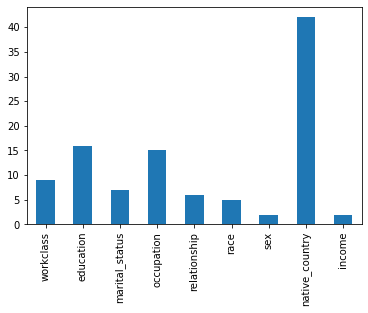

In [53]:
df[cat].nunique().plot(kind='bar')

检查每个分类的不同类别变量

In [54]:
for i in df[cat]:
    print(df[i].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

有一些变量中存在'？'值而不是空值。我们需要删除这些值。

### ****将所有无效值替换为NaN值****

In [55]:
df.replace(' ?', np.nan, inplace= True)

See we can easily get the count of NaN values

In [56]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

##### 在这里可以看到变量中的空值计数

### 使用fillna（）函数替换前一列的空值

In [57]:
df.fillna(method = 'bfill', inplace=True)

In [58]:
df.isna().sum().sum()

0

# 察看数据分布

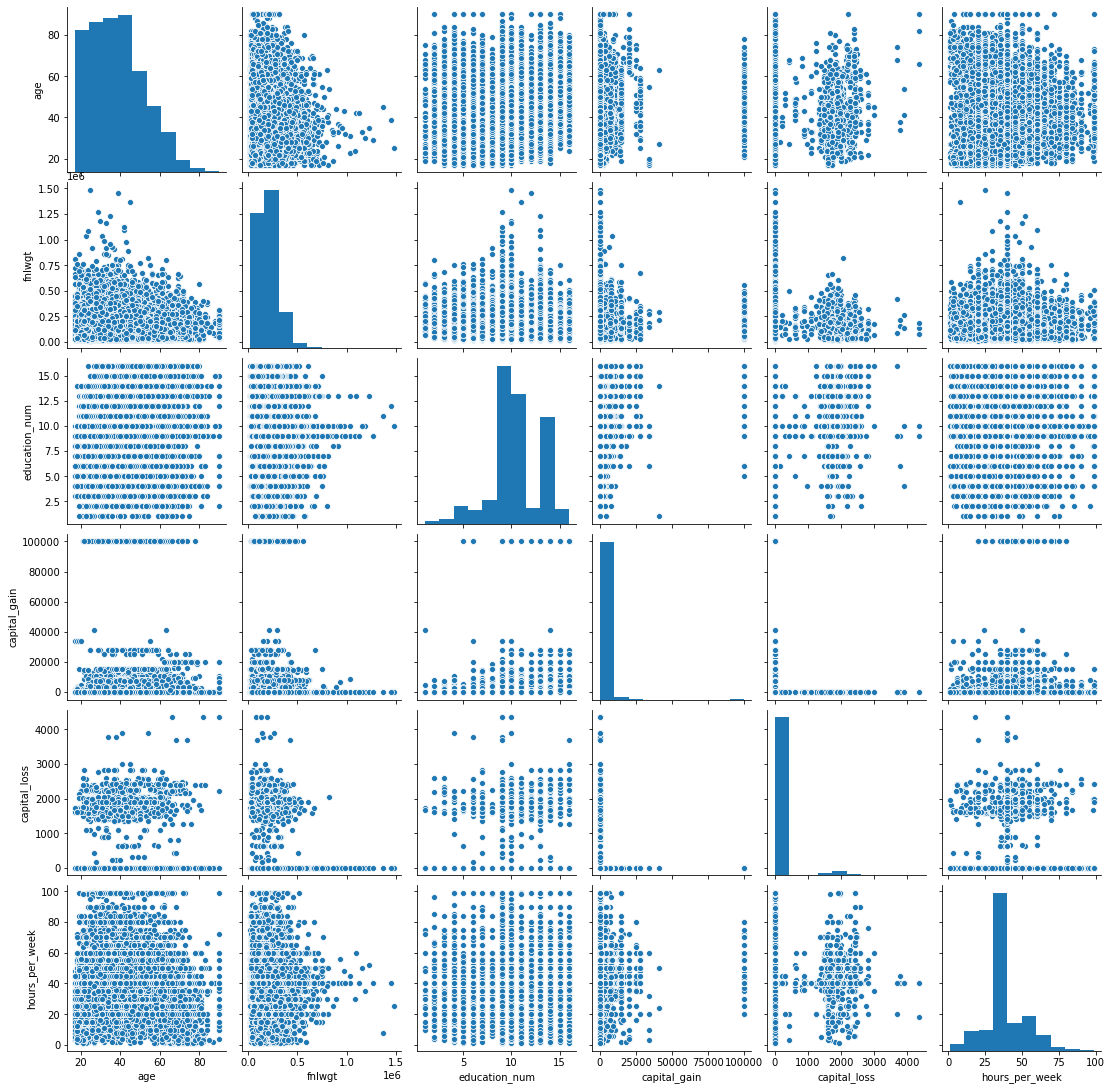

In [59]:
sea.pairplot(df)

# 收入与其他变量间的关系

In [60]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

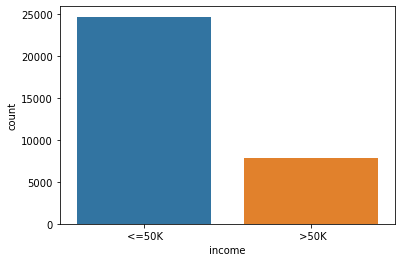

In [61]:
sea.countplot(x= 'income' ,data =df)

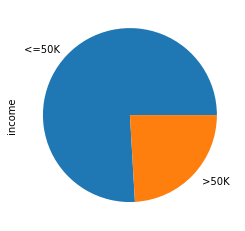

In [62]:
df.income.value_counts().plot(kind='pie')

有超过75%的人数收入不到50k

### 与性别

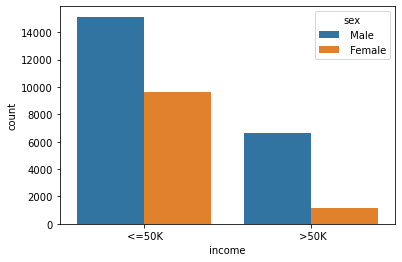

In [63]:
sea.countplot(x="income", hue="sex", data=df)

两个维度上都是男性高于女性

### 与工作类型

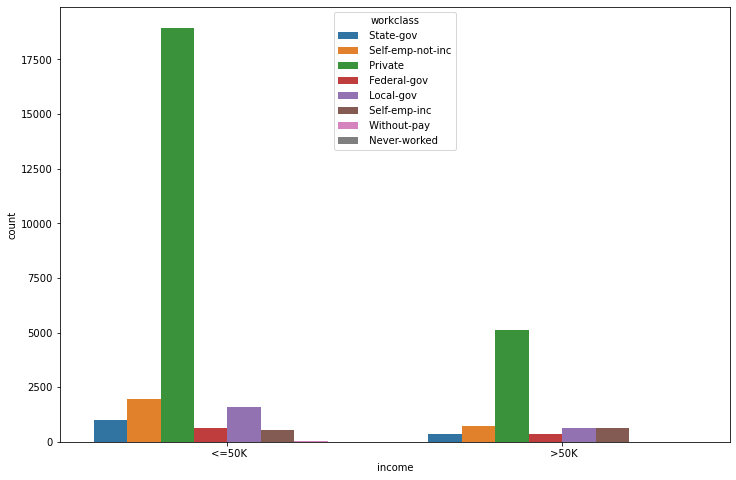

In [64]:
plt.subplots(figsize=(12, 8))
sea.countplot(x="income", hue="workclass", data=df)

两个维度上都是私营的从业人员最多

### 工作类型和性别的关系

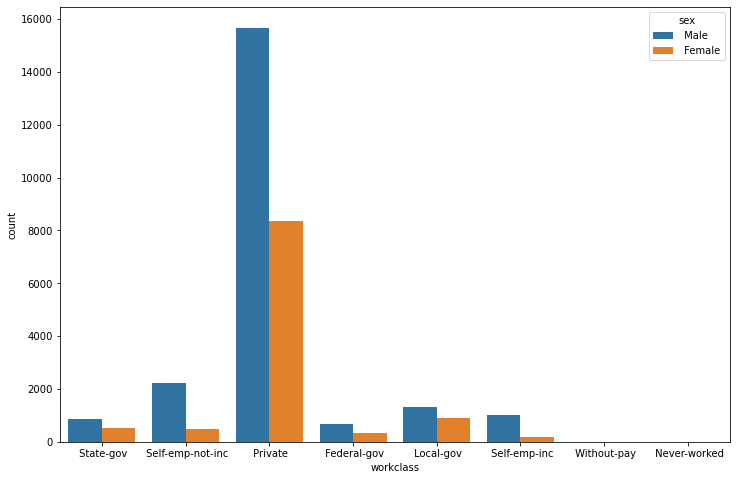

In [65]:
plt.subplots(figsize=(12, 8))
sea.countplot(hue="sex", x="workclass", data=df)

在工作类型中最多的是私营，所有工作类型中都是男性最多

In [66]:
for i in cat:
    print(i, ' contains ', len(df[i].unique()), ' labels')

workclass  contains  8  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  41  labels
income  contains  2  labels


### 对分类变量进行编码

#### 删除目标收入

In [67]:
y = df.income

In [68]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [69]:
y = pd.get_dummies(y,drop_first=True)
df.drop(['income'],axis =1, inplace=True)
num1 = [i for i in df.columns if df[i].dtype!='O']
cat1 = [i for i in df.columns if df[i].dtype=='O']

In [70]:
x = pd.get_dummies(df[cat1])

In [71]:
df.drop(df[cat1],axis = 1,inplace = True)

# EDA 数值变量

In [72]:
df[num1].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


#### 查看年龄变量的分布

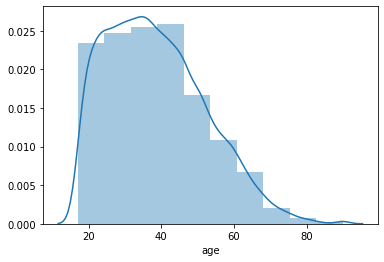

In [73]:
sea.distplot(df.age, bins=10)

大多数人属于20至50岁年龄段。

### 检查数值变量中的异常值

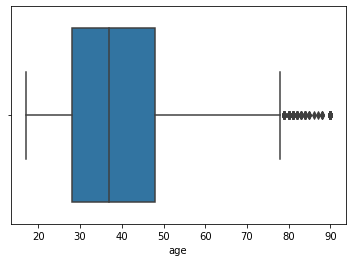

In [74]:
sea.boxplot(df.age)

Age变量中存在一些异常值

### 检查数值变量之间的相关性

In [75]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


变量之间没有相关性

### 缩放数值变量

In [76]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df = scaler.fit_transform(df)

In [77]:
df = pd.DataFrame(df)
x = pd.concat([x,df],axis=1)

### 将数据分为测试和训练

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### 可视化训练数据

In [79]:
X_train.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,0,1,2,3,4,5
26464,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1.10,-0.976909,-0.666667,0.0,0.0,-1.0
16134,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1.70,0.019937,1.333333,0.0,0.0,-4.0
4747,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.25,-0.592112,1.333333,0.0,0.0,0.0
8369,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,-0.55,-1.194718,-0.333333,0.0,0.0,0.0
5741,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.45,0.655623,-2.666667,0.0,0.0,0.0


### 逻辑回归模型

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

###  通过预测测试数据并计算准确性得分来测试逻辑回归模型

In [81]:
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.844490848790075

### 10个决策树的随机森林模型

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,n_estimators=10)
rfc.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10, random_state=0)

### 通过预测测试数据并计算准确性得分来测试随机森林模型

In [83]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8497727551897801

### 用100个决策树拟合随机森林模型

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,n_estimators=100)
rfc.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

### 通过预测测试数据来测试随机森林模型，并使用100个决策树计算准确性得分

In [85]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.854071981329075

##### 通过增加决策树的数量，准确性提高了0.1

## 使用Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(random_state=0)
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(random_state=0)

### 测试bagging model

In [87]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8443680137575237

# 保持超参数（学习率为0.1）拟合极端梯度提升方法，然后计算精度

In [88]:
import xgboost as xgb
model=xgb.XGBClassifier(base_estimator = rfc,random_state=1,learning_rate=0.1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[12:26:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.8694263603979855


**摘要**
- 本次收入预测分类问题，logistic回归达到85.13%。
- 无基模型的bagging准确率为84.39%
- 基于10决策树基模型随机林的集成学习bagging，准确率为84.95%
- 基于100个决策树的基模型随机林集成学习bagging，准确率为85.40%
- 基于随机森林的集成学习boosting技术，准确率为86.94%